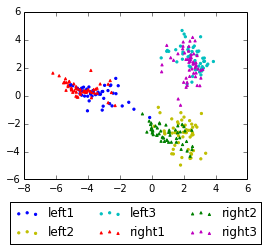

In [16]:
import numpy as np
import dataIO
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as pl
%matplotlib inline
reload(dataIO)

def contains_spikes(values):
    for value in values:
        if value>40000:
            return True
    
    return False

left = []
right = []
for i in range(3):
    left_s, right_s = dataIO.read_twothumb(1, i) # USERID
    
    left_filt = []
    right_filt = []
    for j in range(len(left_s)):
        if not contains_spikes(left_s[j]):
            left_filt.append(left_s[j])
        
        if not contains_spikes(right_s[j]):
            right_filt.append(right_s[j])
    
    left.append(left_filt)
    right.append(right_filt)
    
X = np.array(left[0]+left[1]+left[2]+right[0]+right[1]+right[2])

scaler = preprocessing.StandardScaler().fit(X)   
X_scaled = scaler.transform(X)

pca = PCA(n_components=2)
data = pca.fit_transform(X_scaled)

len_sum = 0
left1 = np.array(data[:len(left[0])]).T
len_sum += len(left[0])
left2 = np.array(data[len_sum:len_sum+len(left[1])]).T
len_sum += len(left[1])
left3 = np.array(data[len_sum:len_sum+len(left[2])]).T
len_sum += len(left[2])
right1 = np.array(data[len_sum:len_sum+len(right[0])]).T
len_sum += len(right[0])
right2 = np.array(data[len_sum:len_sum+len(right[1])]).T
len_sum += len(right[1])
right3 = np.array(data[len_sum:len_sum+len(right[2])]).T

pl.figure(figsize=(4,3))

#line1 = pl.plot(left1[0], left1[1], marker='o', color='b', ls='', label='left 1', s = 0.1)
pl.scatter(left1[0], left1[1], marker='o', color='b', label='left1', s=5)
pl.scatter(left2[0], left2[1], marker='o', color='y', label='left2', s=5)
pl.scatter(left3[0], left3[1], marker='o', color='c', label='left3', s=5)
pl.scatter(right1[0], right1[1], marker='^', color='r', label='right1', s=5)
pl.scatter(right2[0], right2[1], marker='^', color='g', label='right2', s=5)
pl.scatter(right3[0], right3[1], marker='^', color='m', label='right3', s=5)

#pl.legend(loc='best')
pl.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)
#pl.show()
pl.savefig('/home/dimitar/Desktop/Latex/L5Project/mpaper/img/pca1.png', bbox_inches='tight', dpi=400)